In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from bs4 import BeautifulSoup as bs
import requests

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [10]:
link = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/'
response = requests.get(link)
html = response.text

In [11]:
soup = bs(html)

In [43]:
names = soup.find_all('a',{"class":""})
stormevent_details_all = []

# For loop to get all the names
# Reference code from https://medium.com/@yves.jacquot/predicting-tornado-magnitude-with-machine-learning-c76df84d7872
for name in names[7:-2]:
        #print(name)
    #getting only the files with storm events
    if name.attrs['href'].startswith('StormEvents_details'):
        filename = name.attrs['href']
        storm_url = link+filename
        #print(storm_url)
        
        iter_csv = pd.read_csv(storm_url, compression='gzip', iterator=True, chunksize=1000)
        stormevent_details_all.append(pd.concat([chunk[chunk['EVENT_TYPE'].map(lambda x: x.lower())
                                                        == 'tornado'] for chunk in iter_csv], ignore_index=True))
        
combined_tornado_df = pd.concat(stormevent_details_all)


In [13]:
combined_tornado_df.head()


,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE


In [23]:
combined_tornado_df = pd.read_csv('data_sets/tornado_data_1950to2020.csv', low_memory=False)

In [38]:
combined_tornado_df.fillna(0,inplace=True)
combined_tornado_df=combined_tornado_df.drop(columns=['Unnamed: 0'], axis=1)
combined_tornado_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,0.0,10096222,OKLAHOMA,40.0,...,0.0,0,0,35.12,-99.20,35.17,-99.20,0,0,PUB
1,195004,29,1530,195004,29,1530,0.0,10120412,TEXAS,48.0,...,0.0,0,0,31.90,-98.60,31.73,-98.60,0,0,PUB
2,195007,5,1800,195007,5,1800,0.0,10104927,PENNSYLVANIA,42.0,...,0.0,0,0,40.58,-75.70,40.65,-75.47,0,0,PUB
3,195007,5,1830,195007,5,1830,0.0,10104928,PENNSYLVANIA,42.0,...,0.0,0,0,40.60,-76.75,0.00,0.00,0,0,PUB
4,195007,24,1440,195007,24,1440,0.0,10104929,PENNSYLVANIA,42.0,...,0.0,0,0,41.63,-79.68,0.00,0.00,0,0,PUB


In [39]:
tornado_ef = combined_tornado_df[['YEAR','MONTH_NAME','TOR_F_SCALE','STATE','CZ_NAME','TOR_LENGTH','TOR_WIDTH']].copy()
tornado_ef

,YEAR,MONTH_NAME,TOR_F_SCALE,STATE,CZ_NAME,TOR_LENGTH,TOR_WIDTH
0,1950,April,F3,OKLAHOMA,WASHITA,3.40,400.0
1,1950,April,F1,TEXAS,COMANCHE,11.50,200.0
2,1950,July,F2,PENNSYLVANIA,LEHIGH,12.90,33.0
3,1950,July,F2,PENNSYLVANIA,DAUPHIN,0.00,13.0
4,1950,July,F0,PENNSYLVANIA,CRAWFORD,0.00,33.0
...,...,...,...,...,...,...,...
72688,2021,March,EF1,TEXAS,RANDALL,6.61,800.0
72689,2021,March,EFU,TEXAS,BOSQUE,0.53,50.0
72690,2021,March,EF1,LOUISIANA,DE SOTO,2.16,400.0
72691,2021,March,EF1,TEXAS,ARMSTRONG,1.55,800.0


In [41]:
tornado_ef.to_csv('data_sets/tornado_ef.csv', index=False)

In [43]:
tornado_ef.dtypes

YEAR             int64
MONTH_NAME      object
TOR_F_SCALE     object
STATE           object
CZ_NAME         object
TOR_LENGTH     float64
TOR_WIDTH      float64
dtype: object

In [210]:
tornado_count = tornado_ef.groupby(['STATE']).count()
tornado_count
tornado_count = tornado_count.drop(columns=['MONTH_NAME','TOR_F_SCALE','CZ_NAME','TOR_LENGTH','TOR_WIDTH'], axis=1)
tornado_count = tornado_count.reset_index()
tornado_count.shape
# tornado_count.dtypes
tornado_count.head()
#tornado_count.shape

,STATE,YEAR
0,ALABAMA,2757
1,ALASKA,3
2,ARIZONA,269
3,ARKANSAS,2309
4,CALIFORNIA,464


In [216]:
tornado_count.rename(columns={'YEAR':'Tornado_Count'}, inplace=True)
tornado_count.shape

(53, 2)

In [217]:
tornado_count.iloc[:,1:2]

,Tornado_Count
0,2757
1,3
2,269
3,2309
4,464
5,2247
6,118
7,72
8,3
9,3509


In [218]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [219]:
train_features = tornado_count.iloc[:,1:2].sample(frac=0.2, random_state=0)
test_features = tornado_count.iloc[:,1:2]
test_features.head()

sample_train = train_features.copy()
sample_test = test_features.copy()
train_labels = sample_train.pop('Tornado_Count')
test_labels = sample_test.pop('Tornado_Count')

print(train_labels.shape)
test_labels.shape

test_features.shape

(11,)


(53, 1)

In [220]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_labels))

In [221]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_11 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [222]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    verbose=0, epochs=2500)

Wall time: 24.7 s


In [223]:
test_predictions = dnn_model.predict(test_features).flatten()
print(test_predictions.shape)
print(test_predictions)
print(test_labels.shape)
test_labels

(53,)
[2757.821      38.979763  269.3076   2309.7285    464.34787  2247.7158
  118.276405   71.86114    38.979763 3509.9722   2093.684      42.10543
  216.29663  2915.8525   1792.6218   2982.8662   4696.2104   1224.5046
 2475.763     139.28073   397.33398   184.29007  1177.495    2160.6978
 2941.858    2755.8206    418.33838  3081.8862     94.137886  107.27417
  169.28693   639.384     486.3524   1558.5736   1650.5925   1300.5204
 4508.1724    122.27723   937.4454     40.300278   39.713383 1180.4955
 1839.6317   1491.5597   9521.18      133.27956    46.54655    38.833042
  860.4296    128.2785    160.28511  1576.5771    719.40045 ]
(53,)


0     2757
1        3
2      269
3     2309
4      464
5     2247
6      118
7       72
8        3
9     3509
10    2093
11      42
12     216
13    2915
14    1792
15    2982
16    4695
17    1224
18    2475
19     139
20     397
21     184
22    1177
23    2160
24    2941
25    2755
26     418
27    3081
28      94
29     107
30     169
31     639
32     486
33    1558
34    1650
35    1300
36    4507
37     122
38     937
39      21
40      13
41    1180
42    1839
43    1491
44    9519
45     133
46      47
47       1
48     860
49     128
50     160
51    1576
52     719
Name: Tornado_Count, dtype: int64

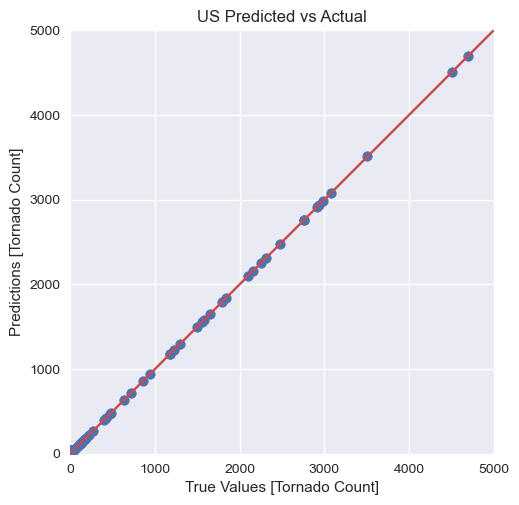

In [224]:
plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Tornado Count]')
plt.ylabel('Predictions [Tornado Count]')

lims = [0, 5000]
plt.xlim(lims)
plt.ylim(lims)
mpl.style.use('seaborn')
plt.title('US Predicted vs Actual')
_ = plt.plot(lims, lims, 'C2')
plt.savefig('data_sets/conus_predicted_tornados.png')
plt.show()

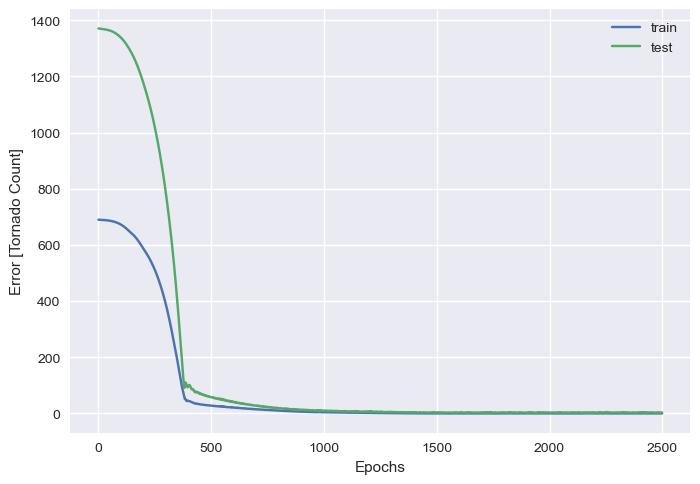

In [225]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Error [Tornado Count]')
mpl.style.use('seaborn')
plt.savefig('data_sets/tornado_accuracy.png')
plt.show()

In [226]:
len(test_labels)
len(test_predictions)
tornado_count.shape

(53, 2)

In [227]:
test_list = list(test_predictions)


In [228]:
df = pd.DataFrame(test_list, columns=['predictions'])
df.head()
df.shape

(53, 1)

In [231]:
tornado_count.insert(loc=2, column='Prediction',value=test_list)
tornado_count.head()

,STATE,Tornado_Count,Prediction
0,ALABAMA,2757,2757.821045
1,ALASKA,3,38.979763
2,ARIZONA,269,269.307587
3,ARKANSAS,2309,2309.728516
4,CALIFORNIA,464,464.347870


In [232]:
tornado_count.to_csv('data_sets/tornado_final.csv', index=False)